#Core concepts pythorch
## Tensors
fundamental structure, like a  number py array but optimice for  math operations
    - creation is done with :torch.tensor,torch.randn, between others
    - you can move them .to(device) or .cuda() 
    - also convert them tu numpy arrays is posible with torch.from_numpy() and .numpy()
in code readding how many dimentions a tensor have is same as how many square parentesis it has at the beguinning of the output when you print it
### broadcasting
Element wise operations are easy to understand,  if you have 2 tensors of lets say 2 dimentions each, and you want to do a  element wise sum you will summ elements on position 0,0  ;0,1; 1,1;1,0  of both tensors so the resuld will be a 2 dimention tensor. Now from this you can  infer  tensors most be same dimention right well not necesary, here is were broadcsting enters the scene.
if one of your tensors is 1 dimension bigger than the other, torch will copy and paste the tensor (one with less dimensions )to fill up the other dimension that is missing.
This concept actually  was born as  a new matematical notation to compress  complex matematical ideas
#### data manipulation
Other operations like slizing or filtering work pretty similar as you will write them in  pyton lists or pandas dataframes
tensor[0,0:2]
tensor[tensor<23]
tensor.reshape(m,n)
tensor.unsqueeze(4) # to add more dimensions
tensor.squeeze(3) to destroy dimensions


In [3]:
import torch
import torch.nn as nn

class TextClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(TextClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=2, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, text):
        """Defines how data flows through the layers."""
        embedded = self.embedding(text)
        outputs, (hidden, cell) = self.lstm(embedded)
        final_output = self.fc(hidden[-1])
        return final_output


# Example usage
vocab_size = 1000  
embedding_dim = 100  
hidden_dim = 256  
output_dim = 2  

model = TextClassifier(vocab_size, embedding_dim, hidden_dim, output_dim)
print(model)


TextClassifier(
  (embedding): Embedding(1000, 100)
  (lstm): LSTM(100, 256, num_layers=2, batch_first=True)
  (fc): Linear(in_features=256, out_features=2, bias=True)
)


## Auto grad
 gradients are ecentiall for back propagation and gradient descent like algorithms, so pytorch aoutomatically calculate them
    - to track computations use .requires_grads= True
    - to compute gradients use loss.backward()
    - to desable tracking for eval or inference with torch.no_grad()
    


In [ ]:
## this code is incompleate and the concepts that wrap it most be understood
import torch
import torch.nn as nn

class MultiHeadedAttention(nn.Module):
    """This is the heart of the Transformer architecture"""
    def __init__(self, h, d_model):
        """
        Inputs:
            h: number of heads
            d_model: model dimension
        """    
        super(MultiHeadedAttention, self).__init__()
        self.h = h
        self.d_model = d_model
        self.linear_w0 = nn.Linear(d_model, d_model)

    def forward(self, query, key, value):
        batch_size = query.size(0)

        query = query.view(batch_size, self.h, self.d_model // self.h).transpose(1, 2)
        key   = key.view(batch_size, self.h, self.d_model // self.h).transpose(1, 2)
        value = value.view(batch_size, self.h, self.d_model // self.h).transpose(1, 2)

        z, _ = attention(query, key, value)  # assuming you defined an attention() function

        z = z.transpose(1, 2).contiguous().view(batch_size, -1)
        z_w0 = self.linear_w0(z)
        return z_w0


## trainning loop and loss functions
torch allows you to have more control over  the trainning loop
1. forward pass : outputs= model(inputs)
2. compute loss : loss =criterion (outputs,targets)
3. backward pass : loss.backward()
4. update parameters: optimizer.step()
5. Reset gradients : optimizer.zero_grad()
the nn module has a ton of usable loss function available to uselike
nn.CrossEntropyLoss , nn.MSEloss, nn.BCEloss

OrderedDict({'volume': tensor([-0.5394]), 'bias': tensor([0.9952])})
epoch 0 | training loss 1.0306020975112915 | test loss 2.537466049194336
epoch 10 | training loss 0.9335713982582092 | test loss 2.417801856994629
epoch 20 | training loss 0.8517749905586243 | test loss 2.3062047958374023
epoch 30 | training loss 0.7827690243721008 | test loss 2.202853202819824
epoch 40 | training loss 0.7246259450912476 | test loss 2.1071527004241943


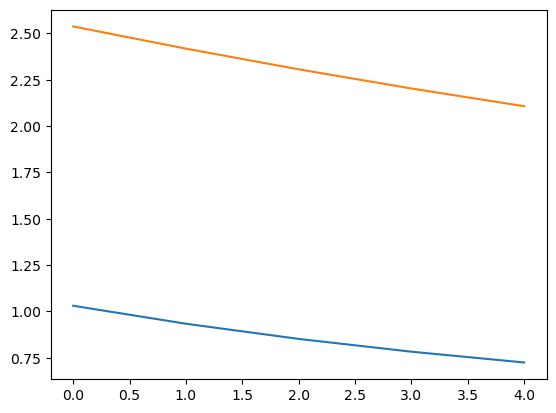

In [8]:
import torch
import matplotlib.pyplot as plt

# Data
X = torch.arange(0, 1, 0.025).unsqueeze(1)
Y = 2.5 * X + 1
train_size = int(0.7 * len(X))
Xtrain, Ytrain = X[:train_size], Y[:train_size]
Xtest, Ytest = X[train_size:], Y[train_size:]

# Model
class LinearRegModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.volume = torch.nn.Parameter(torch.randn(1, dtype=torch.float))
        self.bias = torch.nn.Parameter(torch.randn(1, dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.volume * x + self.bias

# Init
torch.manual_seed(37)
model = LinearRegModel()
print(model.state_dict())  # works now

# Loss + optimizer
loss_fn = torch.nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

# Training
epochs = 50
training_loss_reg = []
test_loss_reg = []

for epoch in range(epochs):
    model.train()
    Ypred = model(Xtrain)
    error = loss_fn(Ypred, Ytrain)

    optimizer.zero_grad()
    error.backward()
    optimizer.step()

    with torch.inference_mode():
        model.eval()
        YpredTest = model(Xtest)
        test_error = loss_fn(YpredTest, Ytest)

    if epoch % 10 == 0:
        training_loss_reg.append(error.detach().cpu().numpy())
        test_loss_reg.append(test_error.detach().cpu().numpy())
        print(f"epoch {epoch} | training loss {error.item()} | test loss {test_error.item()}")
plt.plot(training_loss_reg,label='traning loss')
plt.plot(test_loss_reg,label='testloss')



## Data sets  and data loaders
These are abstractions that allows  the handeling and processing of big data  for model development in a efficient way

so the dataset class eather saves al the data in a instance or allowws you to acces the data in real time via methods of the class, the dataloader class recives as  a parameter a dataset instance of the class and alows you to shuffle it, separate it in batches, and create  multiple workers to process it in a paralel way.

so for this to work the dataset class needs 
__len__() method that opens a comunication path between data loader and dataset where data loader shares how many samples are contain in the data set class

__get_item__() method that recives the index of the data sample and retrives the data sample itself

each worker having its own subset of indexes retrive the data and put it in a box (when creating the batch) and then  a collate functions convert this individual samples in to a  batched tensor.

### Optimizers
learning rate by the gradient and then substrac the step  to the parameters
##### stochastic GD
it uses a single trinning example wich makes it have to make a lot of steps, and take a d tour before   arriving to a minimun
##### mini batch GD
uses small baches of data to upgrate the   gradient, so it takes less steps, but still we have the problem of the step becoming smaller as it gets to the minimun
##### SGD with momentum
it let the "ball" gain speed as it travels down hill making the  rate larger when its going in the right direction 
##### ADA grad
some times momentum avershut the  minimun so ada fix this alowing a  adaptative learnning rate for each parameter.
#### RMS prop
it keeps the steps to become to small when the gradient is too small but still far from the minimun
###### ADAM
the most  used  in neural networks it takes the mean of the passed gradients so it hass momentumm  enoght to surpass local minimun it calculates a second moment  based on the rood squeare minimun

all this can be found on the sgd module

### transfer learnning and fine tunnin

you can load pre trainned models and  freeze some of its layers
    for params in model.parameters():
        params.requires_grad= false

conecting it to a new layer for classification and train just the  new layer 
import torch.nn as nn
model.fc = nn.Linear(model.fc.in_features, 5)  # e.g., 5 new classes
optimizer = torch.optim.Adam(model.fc.parameters(), lr=1e-3)
#### saving models
 you can sabe the weigths the optimizer state or the full artifact, usualy the weigths  and yo  load them in the same architecture. 
 It's also possible to load intermidient trainning states.


 #### evaluation and inference  
 you can activate eval mode to desabel drop out, disable gradient tracking to save memory and do inference faster
 you can move predictions to cpu if you need it 


Would you like me to create a mini 7-day practice roadmap (with 20–30 min exercises each day) that takes you from tensors → custom model → fine-tuning a pretrained model in PyTorch?